In [1]:
pwd


'/Users/praveenswaminathan/Downloads/ece_143/143_project/datasets'

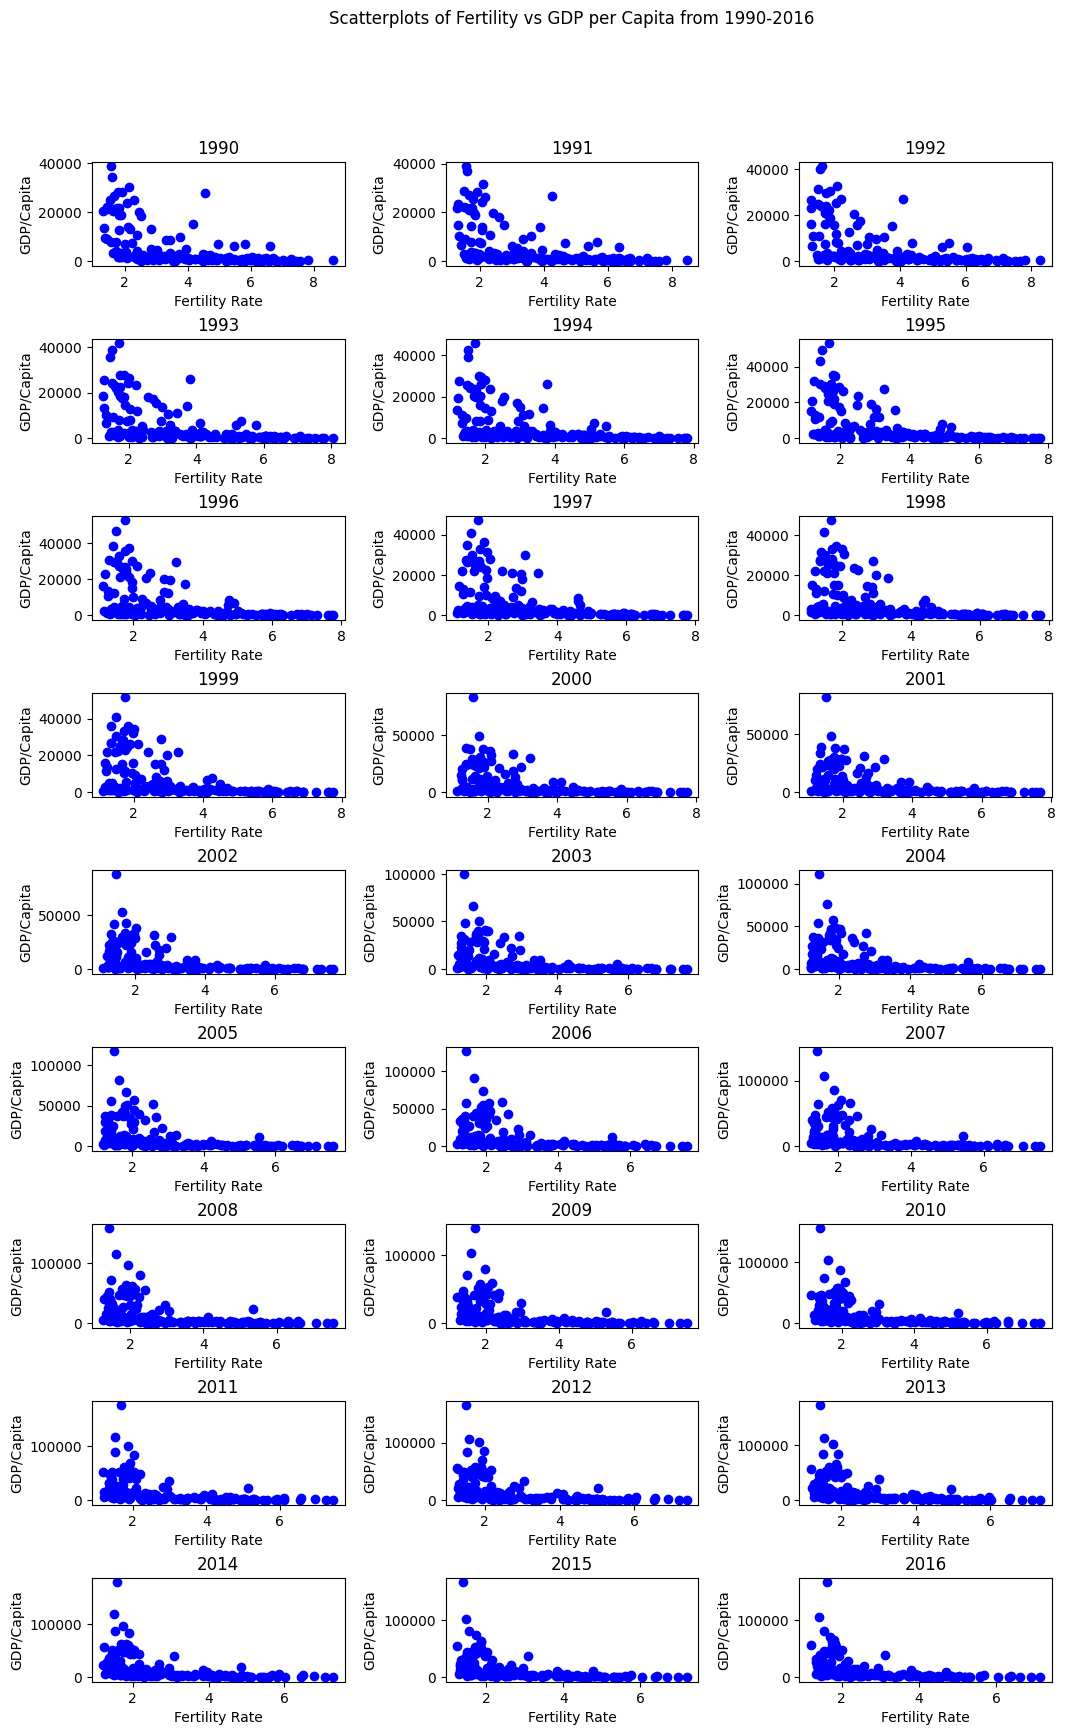

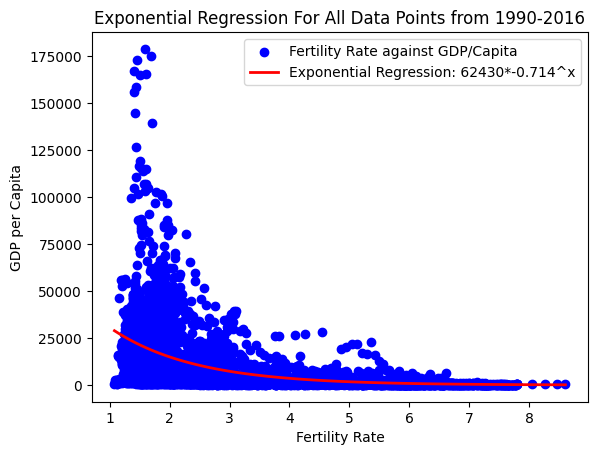

In [25]:
# %load correlation.py
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from scipy.optimize import curve_fit


#remove every character after a comma (gets rid of outdated terms to country names)
def remove_after_character(value, character=','):
    index = value.find(character)
    if index != -1:
        return value[:index]
    else:
        return value

#Cleaning up data more, after initial traversal
dfFert = pd.read_csv('new_fert_data.csv')
dfGDP = pd.read_csv('GDP_data.csv')

#converting both country names to list for data processing
x = dfGDP['Country'].tolist()
x = list(set(x))

y = dfFert['Country'].tolist()

#finding common country names in both lists
fertlist = []
for i in y:
    i = i.split(',', 1)[0]
    fertlist.append(i)


finalized_list = []
for i in fertlist:
    if i not in x:
        finalized_list.append(i)


dfFert = dfFert[~dfFert['Country'].isin(finalized_list)]
dfFert['Country'] = dfFert['Country'].apply(remove_after_character) #using remove character function
dfFert = dfFert.drop(columns=dfFert.columns[0:1]) #dropping one more extraneous column (for easy merging later)
dfFert = dfFert.sort_values(by='Country') #sorting country names alphabetically in Fertility dataset
#cleaning up data part ends ^^

#arbitrary values to hold fertility and GDP values for every shared data points
k = None
l = None

#initializing lists for scatterplot with all data points (needed for correlation equation/graph)
all_fert_vals = []
all_GDP_vals = []

# for every country value that is equal on both lists (same country), the data points from a particular year are plotted in a subplot
# all values are put into the lists from above (based on if they are fertility or GDP values

for index in range(len(dfFert['Country'])):
    value1 = dfFert['Country'].iloc[index]
    for i in range(len(dfGDP['Country'])):
        value2 = dfGDP['Country'].iloc[i]
        if value1 == value2:
            for j in range(1,28):

                k = float((dfFert.iloc[index, j]))
                l =float((dfGDP.iloc[i, j]))
                all_fert_vals.append(k)
                all_GDP_vals.append(l)
                plt.figure(1, figsize=(12,19))
         
                plt.subplot(9,3,j)
                plt.title(f"{1989 + j}") 
                plt.plot(k, l, color='blue', marker='o')
                plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, 
                    top=0.9, wspace=0.4,hspace=0.7)
                plt.xlabel("Fertility Rate")
                plt.ylabel("GDP/Capita")
                plt.suptitle('Scatterplots of Fertility vs GDP per Capita from 1990-2016')


plt.figure(2)
afvnp = np.array(all_fert_vals)
agvnp = np.array(all_GDP_vals)
plt.scatter(afvnp, agvnp, color='blue', label = 'Fertility Rate against GDP/Capita', marker='o')
#change all values not available as 0
afvnp[np.isnan(afvnp)] = 0
agvnp[np.isnan(agvnp)] = 0

#create mask to remove 0 for both lists
mask = (afvnp != 0) & (agvnp != 0)
filtered_array1 = afvnp[mask]
filtered_array2 = agvnp[mask]

#exp regression function
def exp_func(x, a, b):
    return a * np.exp(b * x)

params, covariance = curve_fit(exp_func, filtered_array1, filtered_array2) #find parameters for exp_func
a, b = params

x_fit = np.linspace(min(filtered_array1), max(filtered_array1), 100)
y_fit = exp_func(x_fit, a, b)
#x values are fertility, while the y-vals are the values that are fitted onto the regression function



#plotting scatterplot, and overlayed regression line (equation parameters taken from scipy curvefit
plt.plot(x_fit, y_fit, 'r-', label = "Exponential Regression: 62430*-0.714^x", linewidth=2)
plt.legend()
plt.xlabel("Fertility Rate")
plt.ylabel("GDP per Capita")
plt.title('Exponential Regression For All Data Points from 1990-2016')

#show all plots
plt.show()



